In [185]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import pandas as pd
import datetime
from scipy import stats
from statsmodels.tsa.stattools import adfuller, kpss, coint
import warnings
warnings.filterwarnings("ignore")

In [186]:
today = datetime.datetime.now()
last = datetime.datetime(today.year - 5, today.month, today.day)

year = last.strftime('%Y-%m-%d')
on_year = today.strftime('%Y-%m-%d')

usdp = yf.download('USDP-USD', start=year, end=on_year)
usdc = yf.download('USDC-USD', start=year, end=on_year)
usdt = yf.download('USDT-USD', start=year, end=on_year)
gusd = yf.download('GUSD-USD', start=year, end=on_year)
tusd = yf.download('TUSD-USD', start=year, end=on_year)

coins = [usdp, usdc, usdt, gusd, tusd]
names = ['USDP', 'USDC', 'USDT', 'GUSD', 'TUSD']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [187]:
def plot_coin(coin, name):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(coin.index, coin['Close'], label=name, linewidth=0.5)
    ax.axhline(y=1, color='r', linestyle='--', label='Dollar Line')
    ax.set_ylim(0.90, 1.10)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")
    ax.set_xlabel('Date')
    ax.set_ylabel('Price (USD)')
    ax.set_title(f'{name} Close Price')
    ax.legend()
    plt.show()

def plot_volume(coin, name):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(coin.index, coin['Volume'], label=name, linewidth=0.5)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume')
    ax.set_title(f'{name} Volume')
    ax.legend()
    plt.show()

def plot_rolling_volatility(coin, name):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(coin.index, coin['Close'].rolling(window=30).std(), label=name, linewidth=0.5)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")
    ax.set_xlabel('Date')
    ax.set_ylabel('Rolling Volatility')
    ax.set_title(f'{name} Rolling Volatility')
    ax.legend()
    plt.show()

def stationarity(series, name):
    adf = adfuller(series)
    print(f"ADF Statistic for {name}: {adf[0]}\n p-value: {adf[1]}\n")
    kp = kpss(series)
    print(f"KPSS Statistic for {name}: {kp[0]}\n p-value: {kp[1]}\n")

def cointegration(coins, coin_names):
    results = {}
    for i in range(len(coins)):
        for j in range(i+1, len(coins)):
            coin1 = coins[i]['Close']
            coin2 = coins[j]['Close']
            result = coint(coin1, coin2)
            results[(coin_names[i], coin_names[j])] = {'statistic': result[0], 'p-value': result[1]}
            print(f"Cointegration between {coin_names[i]} and {coin_names[j]}: statistic = {result[0]}, p-value = {result[1]}")
    return results

def granger()

SyntaxError: expected ':' (908770793.py, line 62)

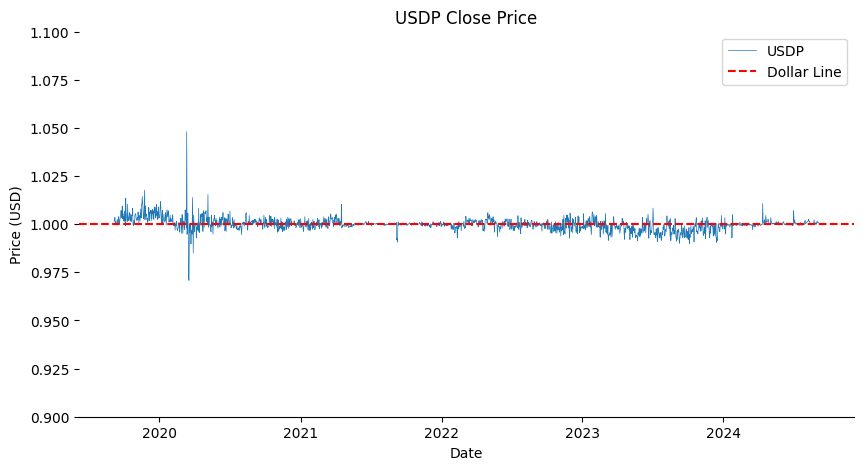

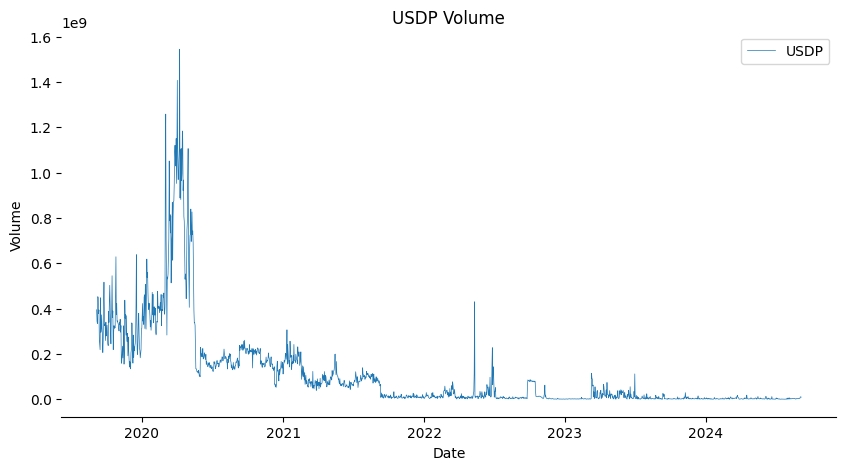

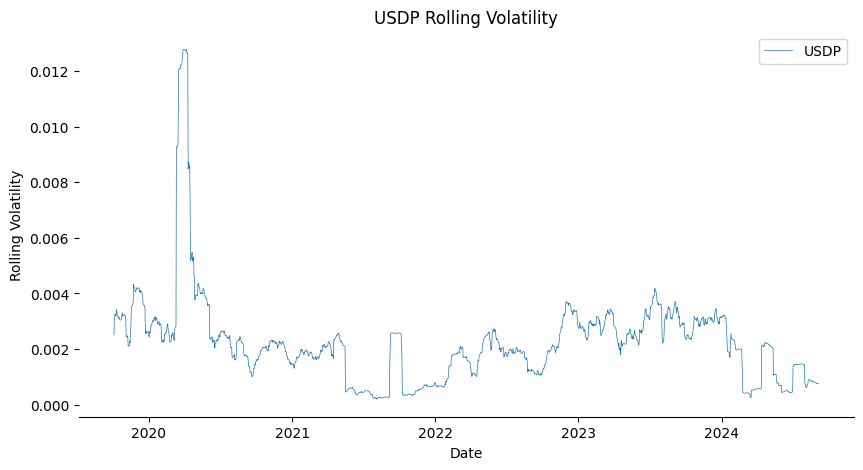

ADF Statistic for USDP: -4.771213643070887
 p-value: 6.171811930216642e-05

KPSS Statistic for USDP: 2.6273269444313145
 p-value: 0.01



In [ ]:
plot_coin(usdp, 'USDP')
plot_volume(usdp, 'USDP')
plot_rolling_volatility(usdp, 'USDP')
stationarity(usdp['Close'], 'USDP')

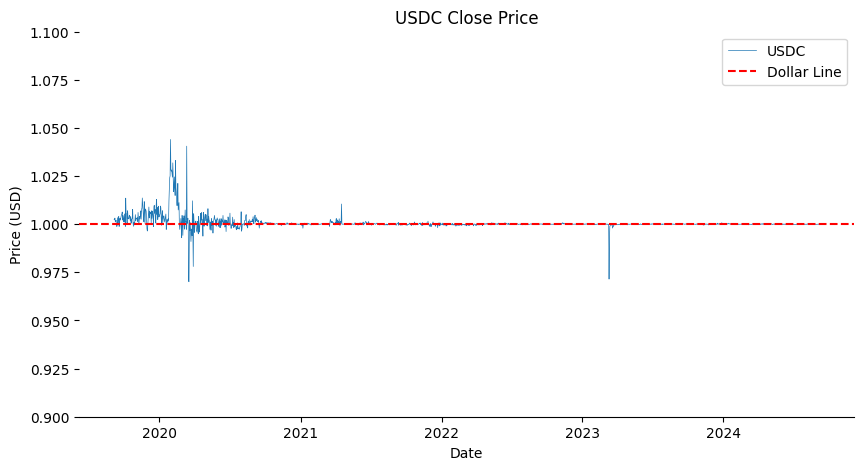

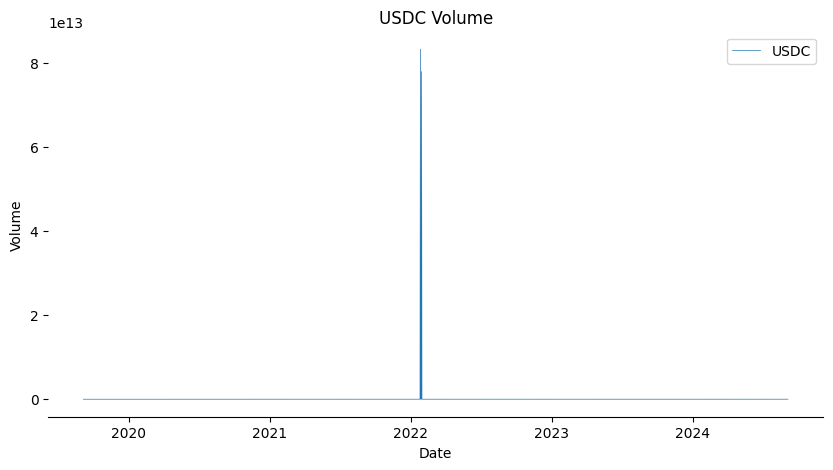

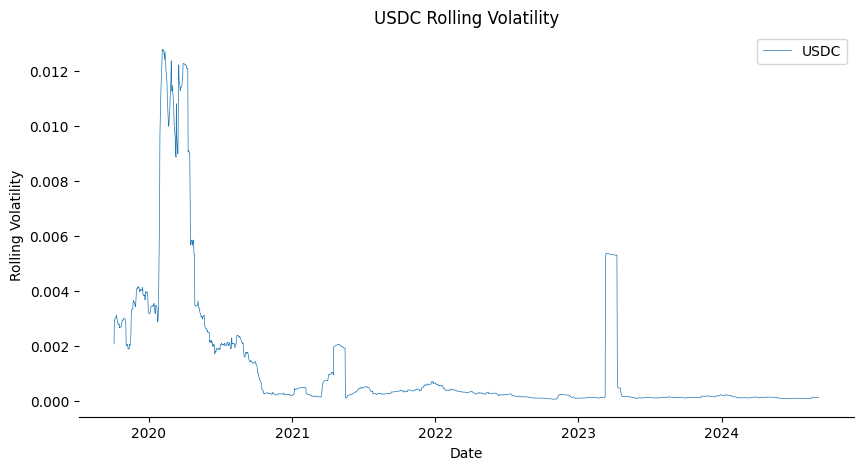

ADF Statistic for USDC: -5.69674098052879
 p-value: 7.842489214560468e-07

KPSS Statistic for USDC: 1.3302704683593698
 p-value: 0.01



In [ ]:
plot_coin(usdc, 'USDC')
plot_volume(usdc, 'USDC')
plot_rolling_volatility(usdc, 'USDC')
stationarity(usdc['Close'], 'USDC')

In [ ]:
usdc['Volume'].sort_values(ascending=True)

Date
2019-09-15         108479017
2019-09-29         114528745
2019-09-28         118395271
2019-09-22         122958976
2019-10-05         131141182
                   ...      
2022-05-12       18612052637
2024-08-05       24826261611
2023-03-11       26682206827
2022-01-29    77941755281506
2022-01-26    83252070566791
Name: Volume, Length: 1826, dtype: int64

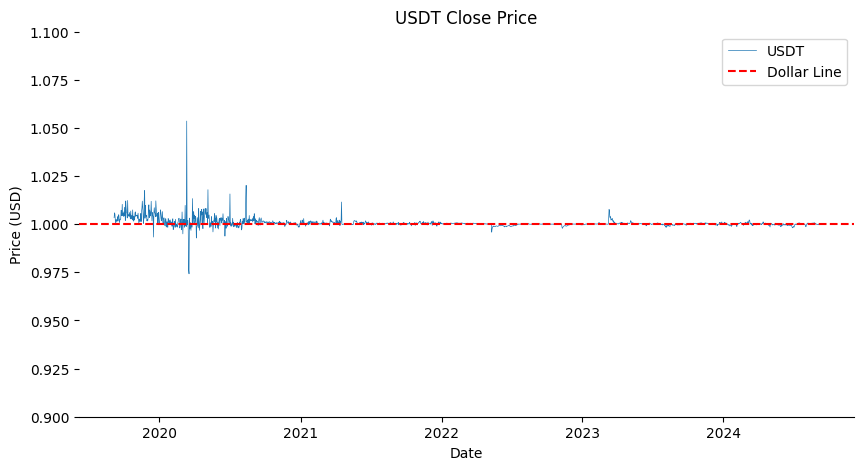

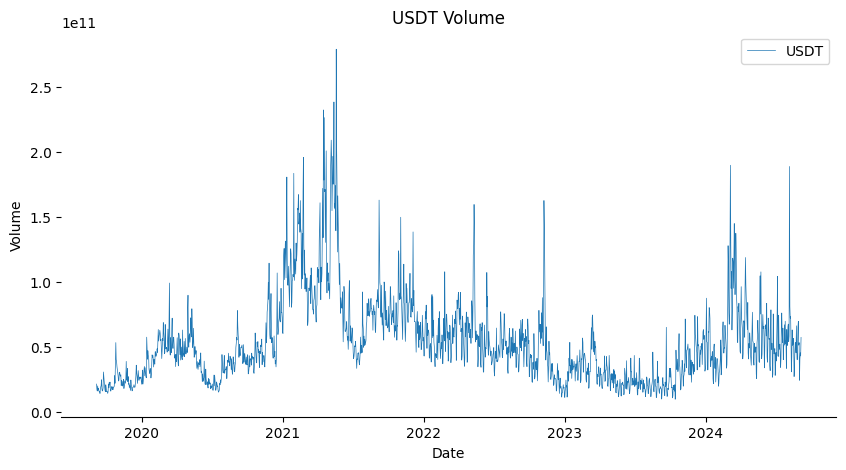

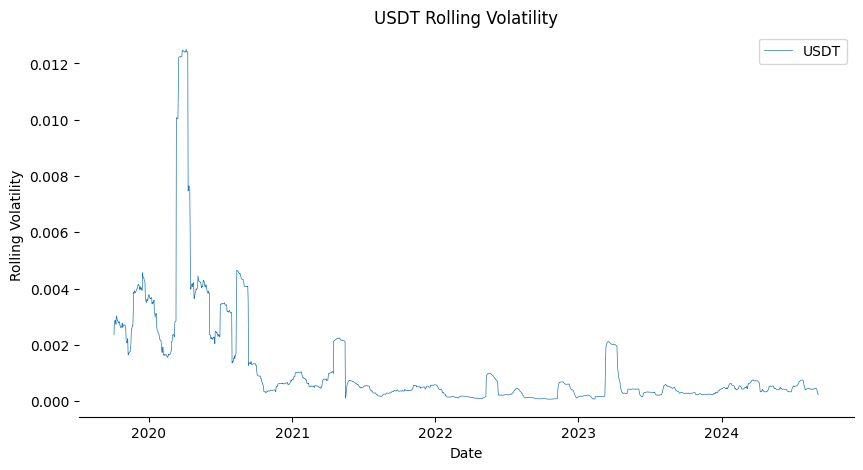

ADF Statistic for USDT: -3.9132867719810815
 p-value: 0.001939210848289973

KPSS Statistic for USDT: 3.239000861272937
 p-value: 0.01



In [ ]:
plot_coin(usdt, 'USDT')
plot_volume(usdt, 'USDT')
plot_rolling_volatility(usdt, 'USDT')
stationarity(usdt['Close'], 'USDT')

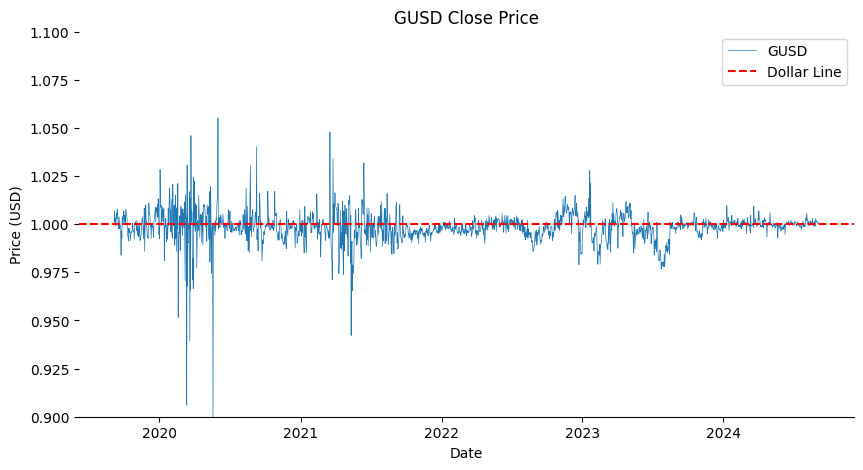

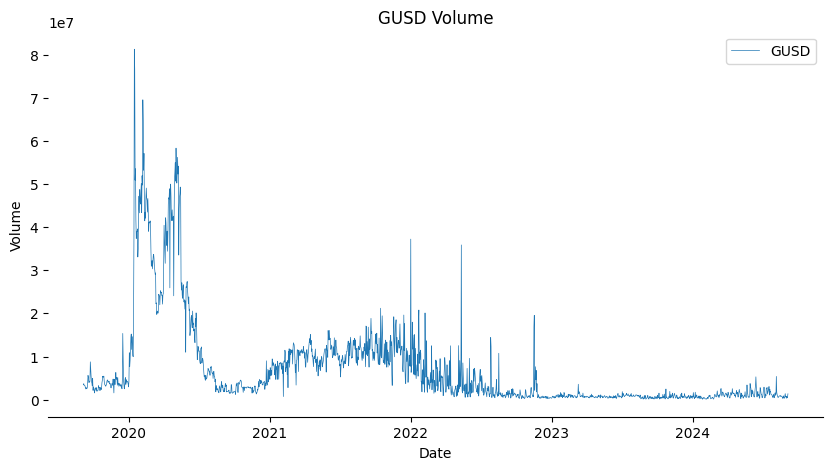

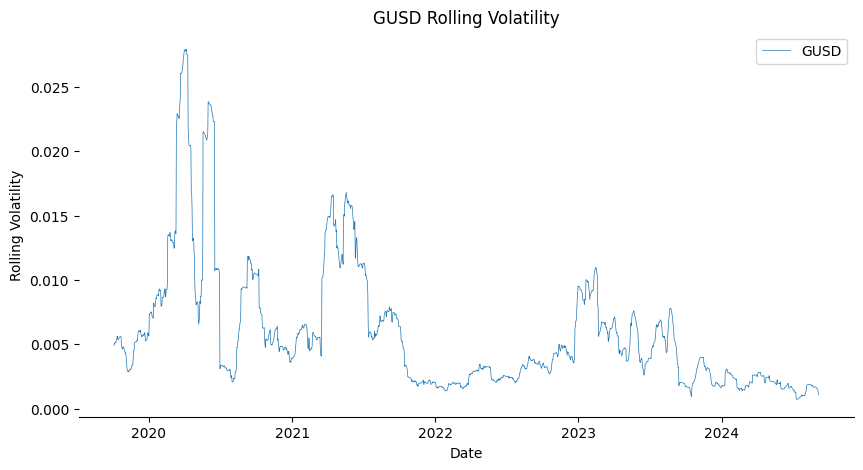

ADF Statistic for GUSD: -6.570335622539843
 p-value: 7.965588247676854e-09

KPSS Statistic for GUSD: 0.1552986194675364
 p-value: 0.1



In [ ]:
plot_coin(gusd, 'GUSD')
plot_volume(gusd, 'GUSD')
plot_rolling_volatility(gusd, 'GUSD')
stationarity(gusd['Close'], 'GUSD')

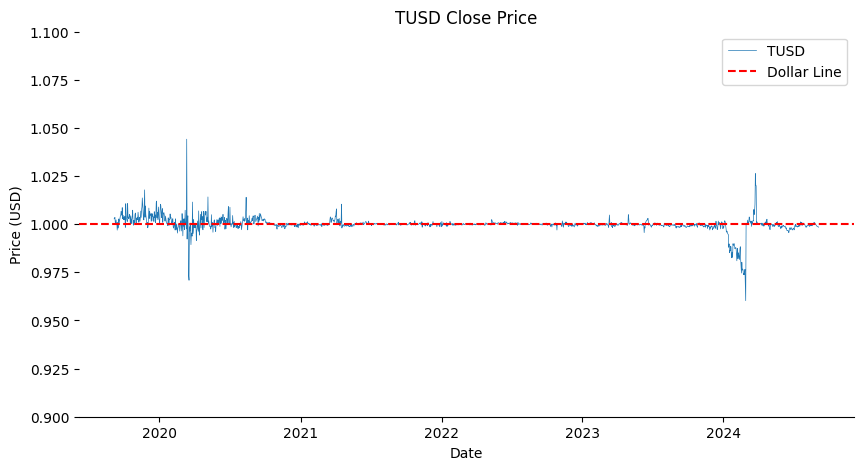

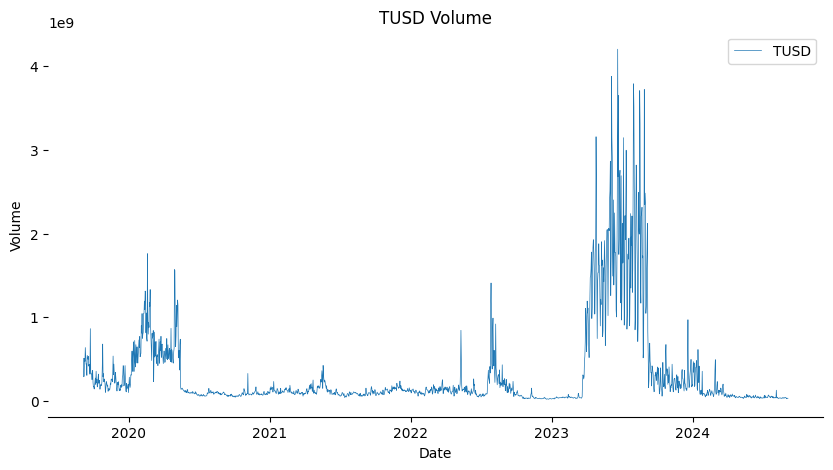

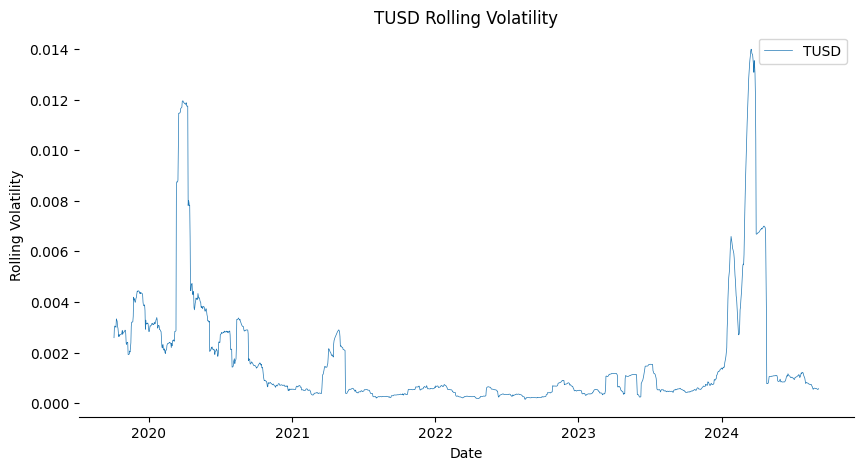

ADF Statistic for TUSD: -6.150511148444731
 p-value: 7.582418301686042e-08

KPSS Statistic for TUSD: 1.3898011872880454
 p-value: 0.01



In [ ]:
plot_coin(tusd, 'TUSD')
plot_volume(tusd, 'TUSD')
plot_rolling_volatility(tusd, 'TUSD')
stationarity(tusd['Close'], 'TUSD')

In [ ]:
cointegration_results = cointegration([usdp, usdc, usdt, gusd, tusd], names)

Cointegration between USDP and USDC: statistic = -5.6603184975344645, p-value = 8.454080975465835e-06
Cointegration between USDP and USDT: statistic = -5.498346163409452, p-value = 1.8058476179083193e-05
Cointegration between USDP and GUSD: statistic = -4.7643288288429435, p-value = 0.00043596756519146264
Cointegration between USDP and TUSD: statistic = -5.155375707010142, p-value = 8.442981702024951e-05
Cointegration between USDC and USDT: statistic = -7.273765197290246, p-value = 1.886349171983675e-09
Cointegration between USDC and GUSD: statistic = -5.696297356494521, p-value = 7.1244988950802285e-06
Cointegration between USDC and TUSD: statistic = -6.608319158553665, p-value = 7.104629163077934e-08
Cointegration between USDT and GUSD: statistic = -3.9324085362261334, p-value = 0.008943891288831106
Cointegration between USDT and TUSD: statistic = -5.5213320106665975, p-value = 1.6233228392218012e-05
Cointegration between GUSD and TUSD: statistic = -6.574755991797792, p-value = 8.487

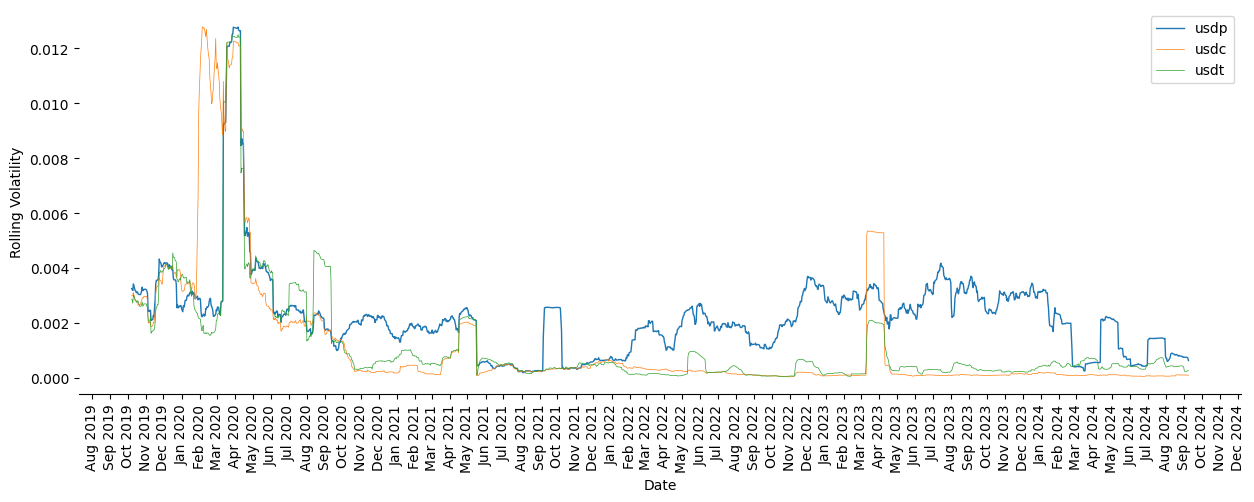

In [197]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(usdp.index, usdp['Close'].rolling(window=30).std(), label="usdp", linewidth=1)
ax.plot(usdc.index, usdc['Close'].rolling(window=30).std(), label="usdc", linewidth=0.5)
ax.plot(usdt.index, usdt['Close'].rolling(window=30).std(), label="usdt", linewidth=0.5)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=90)
ax.set_xlabel('Date')
ax.set_ylabel('Rolling Volatility')
ax.legend()
plt.show()
